# Importando as bibliotecas e realizando o tratamento inicial dos dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dados = pd.read_csv('Dados\Dataset_train.csv')
dados.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
print('Existem nesse dataset %d linhas e %d colunas' %dados.shape)

Existem nesse dataset 54808 linhas e 14 colunas


In [4]:
# Verificando se existem dados nulos e o tipo de dado presente em cada coluna.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
# Realizando uma contagem dos dados nulos de cada coluna.
dados.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Podemos identificar que existem dados nulos nas colunas **Education** e **Previous_year_rating**, logo, será necessário realizar um tratamento inicial nestes dados.

In [6]:
# Removendo as linhas com dados faltantes
dados = dados.dropna()

#Resetando o index após a remoção das linhas 
dados.reset_index(inplace = True, drop = True)
dados

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48655,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
48656,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
48657,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
48658,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48660 entries, 0 to 48659
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  KPIs_met >80%         48660 non-null  int64  
 11  awards_won?           48660 non-null  int64  
 12  avg_training_score    48660 non-null  int64  
 13  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.2+ MB


As linhas com dados faltantes foram removidas, irei verificar se existem dados vazios em alguma das colunas.

In [8]:
dados['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [9]:
dados['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_32', 'region_6', 'region_33', 'region_8',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [10]:
dados['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [11]:
dados['gender'].unique()

array(['f', 'm'], dtype=object)

In [12]:
dados['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [13]:
dados['no_of_trainings'].unique()

array([ 1,  2,  3,  4,  7,  5,  6, 10,  8,  9], dtype=int64)

In [14]:
dados['age'].unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 27, 29, 26, 57, 40,
       42, 23, 59, 44, 50, 56, 20, 25, 41, 47, 36, 46, 60, 43, 54, 24, 22,
       58, 48, 55, 51, 52, 53, 21], dtype=int64)

In [15]:
dados['previous_year_rating'].unique()

array([5., 3., 1., 4., 2.])

In [16]:
dados['length_of_service'].unique()

array([ 8,  4,  7, 10,  2,  5,  6,  3, 16,  9, 26, 12, 11, 17, 14, 13, 19,
       15, 23, 20, 18, 22, 25, 28,  1, 24, 31, 21, 29, 30, 34, 27, 33, 32,
       37], dtype=int64)

In [17]:
dados['KPIs_met >80%'].unique()

array([1, 0], dtype=int64)

In [18]:
dados['awards_won?'].unique()

array([0, 1], dtype=int64)

In [19]:
dados['avg_training_score'].unique()

array([49, 60, 50, 73, 85, 59, 63, 83, 54, 80, 84, 77, 51, 46, 75, 68, 79,
       72, 61, 58, 87, 47, 57, 52, 88, 71, 48, 65, 62, 53, 78, 44, 91, 82,
       69, 74, 86, 90, 92, 67, 89, 56, 76, 81, 70, 45, 55, 39, 94, 93, 64,
       66, 95, 42, 96, 40, 99, 43, 97, 41, 98], dtype=int64)

In [20]:
# Renomendo o nome das colunas
dados.rename(columns = {'employee_id':'id_empregado', 'department':'departamento',
                        'region':'regiao', 'education':'grau_instrucao',
                        'gender':'genero', 'recruitment_channel':'canal_recrutamento',
                        'no_of_trainings':'qtd_treinamentos', 'age':'idade', 
                        'length_of_service':'tempo_de_servico',
                        'KPIs_met >80%':'KPIs_atingidos >80%', 'awards_won?':'premiado?',
                        'avg_training_score': 'pontuacao_media_treinamento','is_promoted':'promovido'}, inplace = True)
dados.head()

,id_empregado,departamento,regiao,grau_instrucao,genero,canal_recrutamento,qtd_treinamentos,idade,previous_year_rating,tempo_de_servico,KPIs_atingidos >80%,premiado?,pontuacao_media_treinamento,promovido
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [21]:
# Traduzindo as linhas
dados['departamento'] = dados['departamento'].replace({'Sales & Marketing':'Vendas_e_Marketing',
                                                       'Operations':'Operacoes',
                                                       'Technology':'TI',
                                                       'Analytics':'Analistas',
                                                       'R&D':'P&D', 
                                                       'Procurement':'Compras',
                                                       'Finance':'Financeiro', 
                                                       'HR':'RH', 
                                                       'Legal':'Jurídico'})


dados['grau_instrucao'] = dados['grau_instrucao'].replace({"Master's & above":'Mestrado_ou_Superior', 
                                                           "Bachelor's":'Bacharel', 
                                                           'Below Secondary':'Abaixo_Ensino_medio'})

dados['canal_recrutamento'] = dados['canal_recrutamento'].replace({'sourcing':'Anuncio',
                                                                   'other':'Outro',
                                                                   'referred':'Indicação'})

dados.head()

,id_empregado,departamento,regiao,grau_instrucao,genero,canal_recrutamento,qtd_treinamentos,idade,previous_year_rating,tempo_de_servico,KPIs_atingidos >80%,premiado?,pontuacao_media_treinamento,promovido
0,65438,Vendas_e_Marketing,region_7,Mestrado_ou_Superior,f,Anuncio,1,35,5.0,8,1,0,49,0
1,65141,Operacoes,region_22,Bacharel,m,Outro,1,30,5.0,4,0,0,60,0
2,7513,Vendas_e_Marketing,region_19,Bacharel,m,Anuncio,1,34,3.0,7,0,0,50,0
3,2542,Vendas_e_Marketing,region_23,Bacharel,m,Outro,2,39,1.0,10,0,0,50,0
4,48945,TI,region_26,Bacharel,m,Outro,1,45,3.0,2,0,0,73,0


# Balanceamento e encodilng dos dados

<AxesSubplot:title={'center':'Distribuição da variável target'}>

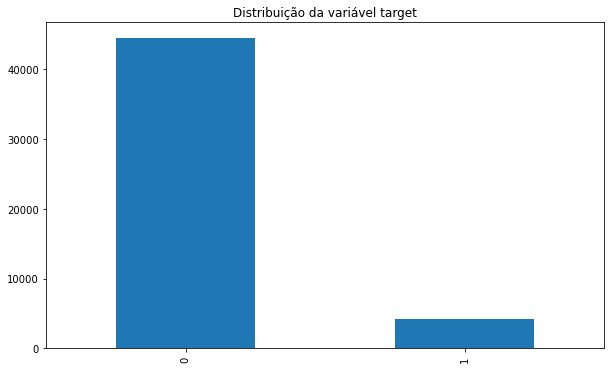

In [22]:
# Plotando a distribuição da variável target
dados_count = dados['promovido'].value_counts()
ax = dados_count.plot.bar()
ax.figure.set_size_inches(10,6)
ax.set_title('Distribuição da variável target')
ax

In [23]:
# Quantidade de registros para cada classe
dados_count

0    44428
1     4232
Name: promovido, dtype: int64

> A variável target **promovido** possui um grande desbalanceamento entre as suas classes. 

Como é possível identificar na imagem acima, existem cerca de 10 vezes mais registros de pessoas que não deveriam ser promovidas.

Por isso, uma das medidas que precisam ser adotadas é o **balancemento** das variáveis, para que o modelo apresente um bom desempenho de classificação de ambas. O balanceamento pode ser realizado atravez de um **UnderSampling**, que iguala as variáveis removendo o "excesso" da variável que possui a maior quantidade de registros, ou de um **OverSampling**, que cria novos registros da variável minoritária até que ambas tenham a mesma quantidade de registros.

In [24]:
#Iniciando o processo de encoldingo doa dados

dados['genero'] = dados['genero'].replace({'f':0, 'm':1})
dados['canal_recrutamento'] = dados['canal_recrutamento'].replace({'Anuncio':0,'Indicação':1, 'Outro':2})
dados['grau_instrucao'] = dados['grau_instrucao'].replace({'Bacharel':0,'Mestrado_ou_Superior':1,'Abaixo_Ensino_medio':2})

dados['regiao'] = dados['regiao'].replace({'region_7':7, 'region_22':22, 'region_19':19,
                                           'region_23':23, 'region_26':26, 'region_2':2,
                                           'region_20':20, 'region_34':34, 'region_1':1, 
                                           'region_4':4, 'region_29':29, 'region_31':31,
                                           'region_15':15, 'region_14':14, 'region_11':11,
                                           'region_5':5, 'region_28':28, 'region_17':17,
                                           'region_13':13, 'region_16':16, 'region_25':25,
                                           'region_10':10, 'region_27':27, 'region_30':30,
                                           'region_12':12, 'region_21':21, 'region_32':32,
                                           'region_6':6, 'region_33':33, 'region_8':8, 
                                           'region_24':24, 'region_3':3, 'region_9':9, 
                                           'region_18':18})

# Aplicando o Onehotencolding para a variável departamento

dados = pd.get_dummies(data = dados, columns = ['departamento'])
dados.head()


,id_empregado,regiao,grau_instrucao,genero,canal_recrutamento,qtd_treinamentos,idade,previous_year_rating,tempo_de_servico,KPIs_atingidos >80%,...,promovido,departamento_Analistas,departamento_Compras,departamento_Financeiro,departamento_Jurídico,departamento_Operacoes,departamento_P&D,departamento_RH,departamento_TI,departamento_Vendas_e_Marketing
0,65438,7,1,0,0,1,35,5.0,8,1,...,0,0,0,0,0,0,0,0,0,1
1,65141,22,0,1,2,1,30,5.0,4,0,...,0,0,0,0,0,1,0,0,0,0
2,7513,19,0,1,0,1,34,3.0,7,0,...,0,0,0,0,0,0,0,0,0,1
3,2542,23,0,1,2,2,39,1.0,10,0,...,0,0,0,0,0,0,0,0,0,1
4,48945,26,0,1,2,1,45,3.0,2,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
#Removendo a coluna id_empregado
dados = dados.drop(columns = 'id_empregado', axis = 1)

In [26]:
# Separando as variáveis entre X e y para aplicação do modelo
X = dados.drop(columns = 'promovido', axis = 1)
y = dados['promovido']

In [27]:
# Normalizando os dados 
from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_norm = norm.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns = X.columns)
X_norm


,regiao,grau_instrucao,genero,canal_recrutamento,qtd_treinamentos,idade,previous_year_rating,tempo_de_servico,KPIs_atingidos >80%,premiado?,pontuacao_media_treinamento,departamento_Analistas,departamento_Compras,departamento_Financeiro,departamento_Jurídico,departamento_Operacoes,departamento_P&D,departamento_RH,departamento_TI,departamento_Vendas_e_Marketing
0,0.114036,0.016291,0.000000,0.000000,0.016291,0.570181,0.081454,0.130327,0.016291,0.0,0.798253,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.016291
1,0.310136,0.000000,0.014097,0.028194,0.014097,0.422913,0.070485,0.056388,0.000000,0.0,0.845826,0.000000,0.0,0.0,0.0,0.014097,0.0,0.000000,0.000000,0.000000
2,0.297529,0.000000,0.015659,0.000000,0.015659,0.532421,0.046978,0.109616,0.000000,0.0,0.782972,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.015659
3,0.336890,0.000000,0.014647,0.029295,0.029295,0.571248,0.014647,0.146474,0.000000,0.0,0.732370,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.014647
4,0.289785,0.000000,0.011146,0.022291,0.011146,0.501550,0.033437,0.022291,0.000000,0.0,0.813626,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.011146,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48655,0.234213,0.000000,0.016730,0.033459,0.033459,0.518615,0.016730,0.033459,0.000000,0.0,0.819747,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.016730
48656,0.148525,0.000000,0.010609,0.000000,0.010609,0.509228,0.031827,0.180352,0.000000,0.0,0.827496,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.010609,0.000000
48657,0.371540,0.013761,0.000000,0.027521,0.013761,0.509148,0.027521,0.082564,0.000000,0.0,0.770602,0.000000,0.0,0.0,0.0,0.013761,0.0,0.000000,0.000000,0.000000
48658,0.011941,0.000000,0.011941,0.023882,0.011941,0.322412,0.059706,0.035824,0.011941,0.0,0.943355,0.011941,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


# Aplicando o Oversampling

In [28]:
from imblearn.over_sampling import SMOTE

# Instanciando uma variável com um objeto SMOTE
smt = SMOTE()

#Balanceando as variáveis
X_norm,y = smt.fit_resample(X_norm,y)

# Verificando a nova distribuição
y.value_counts()

0    44428
1    44428
Name: promovido, dtype: int64

# Iniciando o processo de modelagem dos dados

In [29]:
from sklearn.model_selection import train_test_split
# Definindo uma SEED
SEED = 7
np.random.seed(SEED)

# Separadno os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3, random_state = SEED)


In [30]:
# Definindo a função que irá rodar os modelos, realizar a predição e devolver as métricas

from sklearn import metrics

def modelo(classificador):
    SEED = 7
    np.random.seed(SEED)
    modelo = classificador
    modelo.fit(X_train, y_train)
    return modelo

def predicao(modelo):
    y_pred = modelo.predict(X_test)
    return y_pred

def metricas(y_test, y_pred):
    acuracia = metrics.accuracy_score(y_test, y_pred)*100
    precisao = metrics.precision_score(y_test, y_pred)*100
    recall = metrics.recall_score(y_test, y_pred)*100
    f1 = metrics.f1_score(y_test, y_pred)*100
    
    print('A acurácia do modelo foi de %.2f%%' %acuracia)
    print('A precisão do modelo foi de %.2f%%'%precisao)
    print('A taxa de recall do modelo foi de %.2f%%'% recall)
    print('A taxa de balanceamento do modelo foi de %.2f%%'%f1)
    
    mc = metrics.confusion_matrix(y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = mc)
    disp.plot()


In [31]:
#Definindo a função de plotagem da curva ROC.
from sklearn.metrics import roc_auc_score, roc_curve

def curva_roc(modelo, X_test, y_test):
#Calculando a probabilidade    
    prob_previsao = modelo.predict_proba(X_test)[:,1]
# Calculando a taxa dos falsos positivos e verdadeiros positivos    
    tfp, tvp, limite = roc_curve(y_test, prob_previsao)
#Calculando o valor de AUC    
    auc = roc_auc_score(y_test, prob_previsao)
#Plotando a curva 
    plt.subplots(1, figsize = (15,10))
    plt.title('Curva ROC', fontsize = 20)
    plt.plot(tfp, tvp, label = 'LR, auc =%s'%(auc))
    plt.plot([0,1],[0,1], color = 'red', lw= 2, linestyle = '--')
    plt.plot([0,0],[1,0], color ='green', lw= 2, linestyle = '--'),plt.plot([1,1], color ='green', lw= 2, linestyle = '--') 
    plt.legend(loc = 4)
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.show()

A acurácia do modelo foi de 67.46%
A precisão do modelo foi de 63.32%
A taxa de recall do modelo foi de 81.94%
A taxa de balanceamento do modelo foi de 71.44%


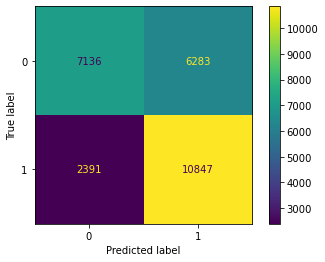

In [32]:
from sklearn.naive_bayes import GaussianNB

gnb = modelo(GaussianNB())
previsoes = predicao(gnb)
metricas(y_test, previsoes)

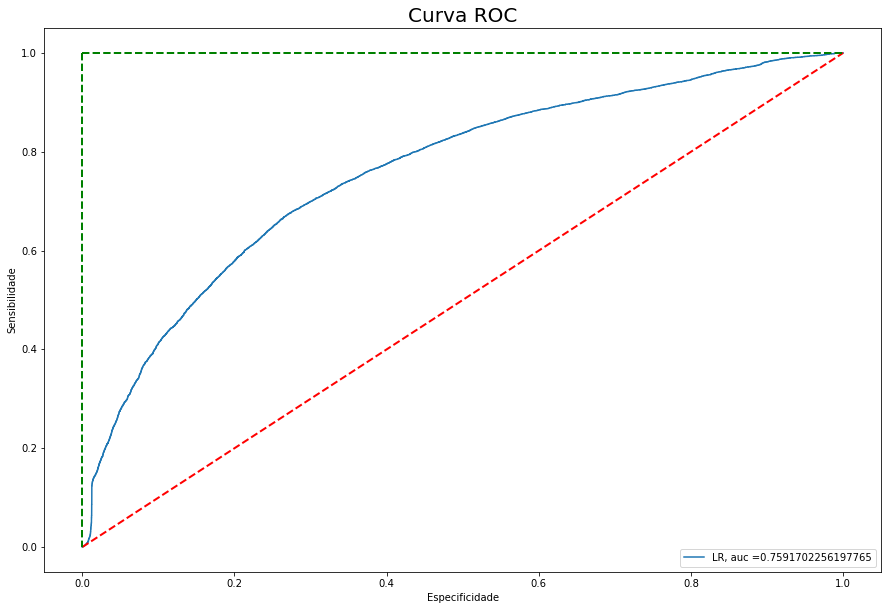

In [33]:
curva_roc(gnb, X_test, y_test)

A acurácia do modelo foi de 81.58%
A precisão do modelo foi de 77.67%
A taxa de recall do modelo foi de 88.30%
A taxa de balanceamento do modelo foi de 82.64%


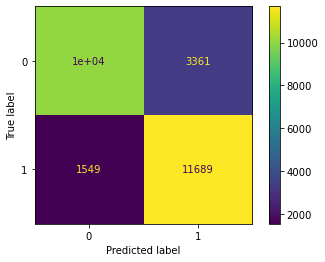

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = modelo(RandomForestClassifier(max_depth = 5, random_state = SEED))
previsoes = predicao(rfc)
metricas(y_test, previsoes)

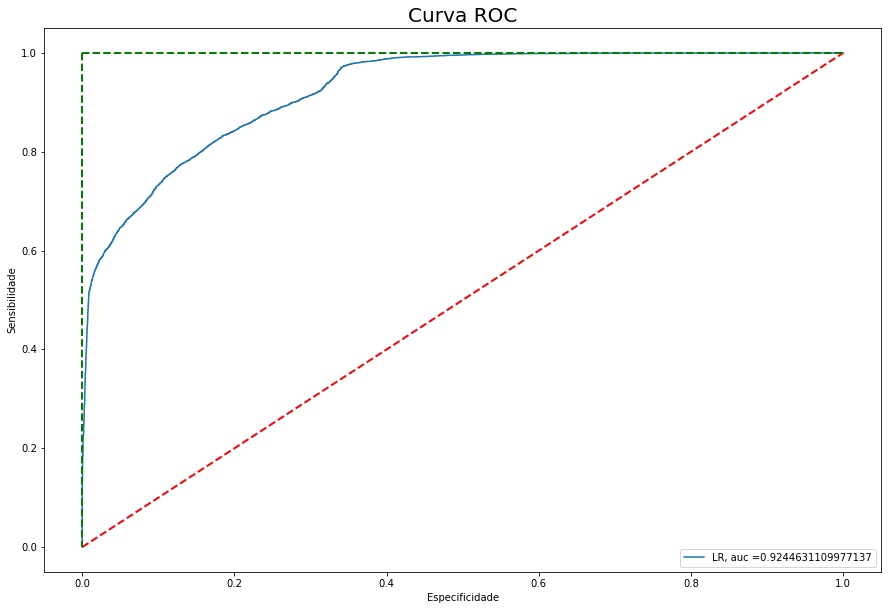

In [35]:
curva_roc(rfc, X_test, y_test)

A acurácia do modelo foi de 68.67%
A precisão do modelo foi de 67.02%
A taxa de recall do modelo foi de 72.65%
A taxa de balanceamento do modelo foi de 69.73%


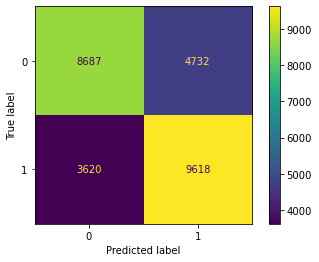

In [36]:
from sklearn.linear_model import LogisticRegression 
lr = modelo(LogisticRegression(random_state = SEED, solver = 'saga'))
previsoes = predicao(lr)
metricas(y_test, previsoes)

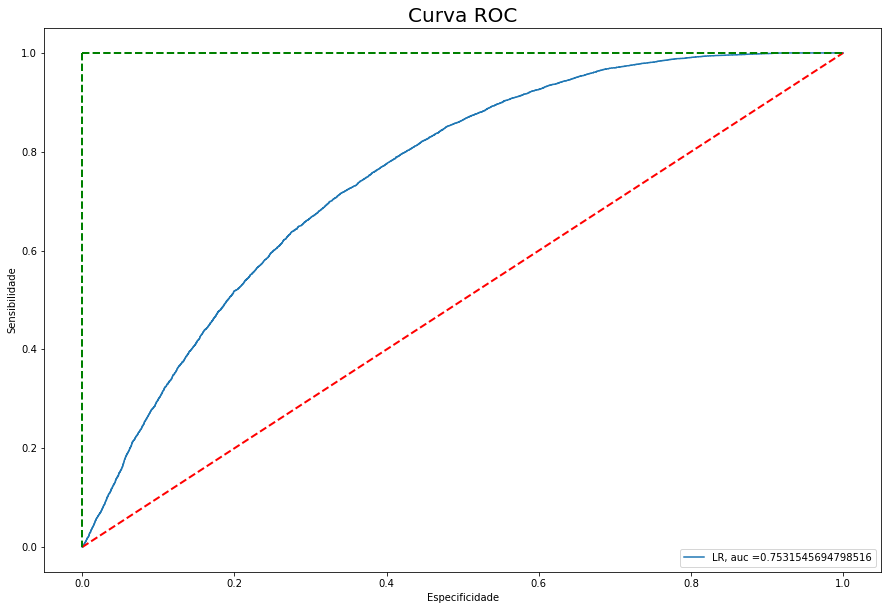

In [37]:
curva_roc(lr, X_test, y_test)

A acurácia do modelo foi de 85.25%
A precisão do modelo foi de 77.24%
A taxa de recall do modelo foi de 99.68%
A taxa de balanceamento do modelo foi de 87.03%


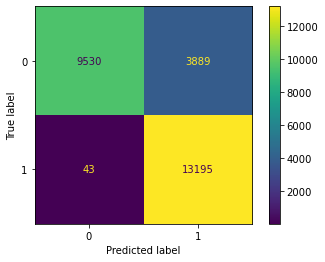

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = modelo(KNeighborsClassifier())
previsoes = predicao(knn)
metricas(y_test, previsoes)

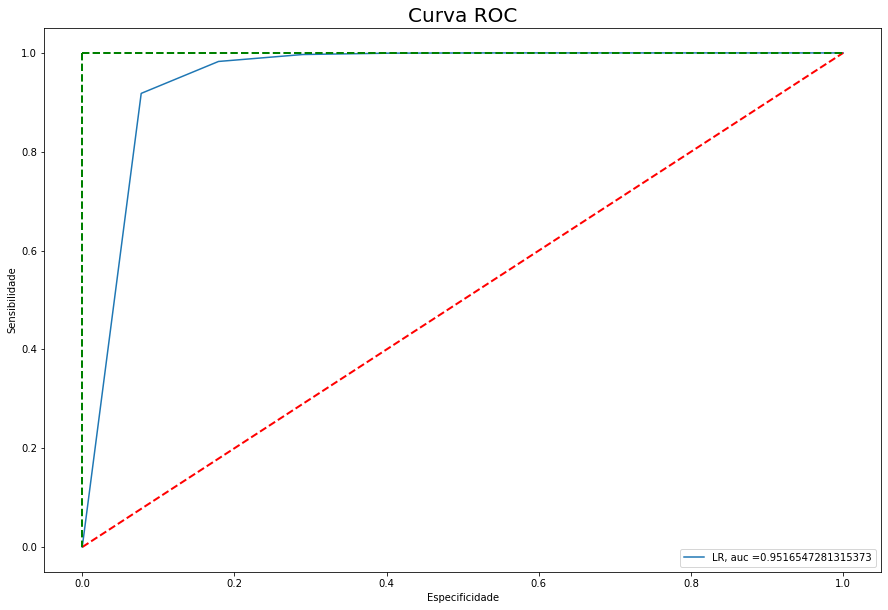

In [39]:
curva_roc(knn, X_test, y_test)

Depois de observar as métricas obtidas pelos modelo acima e com a finalidade de atender o objetivo deste projeto, acredito que os modelos **RandomForestClassifier** e o **KneighborsClassifier** são os melhores modelos dentre os utilizados, visto que ambos apresentaram as melhores AUC-ROC.

# Otimizando os modelos

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

SEED = 7
np.random.seed(SEED)

parametros = {'n_estimators':np.arange(40,120, step = 20),
              'criterion':['gini', 'entropy'],
              'max_depth':[3,4,5,6],
              'min_samples_split':np.arange(50,200, step = 50)
               }
#Definindo o cv
cv = KFold(n_splits= 5, shuffle= True, random_state = SEED)

#Instanciar o modelo
modelo_rf = RandomForestClassifier(random_state = SEED)

#Instancinado o objeto randomizedSearch
randomized_rf = RandomizedSearchCV(modelo_rf, parametros, n_iter = 10, scoring = 'roc_auc', cv = cv,
                                   return_train_score= False, random_state = SEED)

#Ajustando o modelo 
modeloaj_rf = randomized_rf.fit(X_norm,y)

In [41]:
#Colocando os resultados em um DataFrame
resultado = pd.DataFrame(modeloaj_rf.cv_results_)
resultado.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.747221,0.016492,0.040661,0.000431,40,150,4,gini,"{'n_estimators': 40, 'min_samples_split': 150,...",0.916021,0.914078,0.913766,0.915651,0.913687,0.914641,0.000992,8
1,5.679095,0.087581,0.083031,0.001999,80,150,5,entropy,"{'n_estimators': 80, 'min_samples_split': 150,...",0.928759,0.929937,0.926866,0.930050,0.928204,0.928763,0.001179,6
2,4.219382,0.028775,0.063478,0.000313,60,100,5,entropy,"{'n_estimators': 60, 'min_samples_split': 100,...",0.932263,0.929467,0.929668,0.932514,0.930236,0.930830,0.001300,3
3,4.223544,0.018310,0.063483,0.000305,60,50,5,entropy,"{'n_estimators': 60, 'min_samples_split': 50, ...",0.931013,0.929110,0.928038,0.931269,0.930722,0.930030,0.001248,5
4,3.621103,0.064706,0.070927,0.002151,60,50,6,gini,"{'n_estimators': 60, 'min_samples_split': 50, ...",0.938382,0.939560,0.936395,0.939198,0.938883,0.938484,0.001114,1


In [43]:
best_estimator = modeloaj_rf.best_params_
print(best_estimator)



{'n_estimators': 60, 'min_samples_split': 50, 'max_depth': 6, 'criterion': 'gini'}


In [42]:

from sklearn.model_selection import cross_val_score

score = cross_val_score(modeloaj_rf, X_norm, y, cv = cv, scoring = 'roc_auc')

media = score.mean()*100
desvio_pad = score.std()*100

print('A AUC-ROC média do modelo é de %.2f%%'%media)
print('O intervá-lo é de [%.2f%%, %.2f%%]'%(media - 2 * desvio_pad, media + 2 * desvio_pad))


A AUC-ROC média do modelo é de 93.84%
O intervá-lo é de [93.42%, 94.27%]


In [47]:
#Otimizando o modelo KNN

SEED = 7
np.random.seed(SEED)

parametros = {'n_neighbors':np.arange(5,45, step = 10),
              'metric':['euclidean','manhattan', 'minkowski'],
              'weights':['uniform', 'distance']}

#Definindo o cv
cv = KFold(n_splits= 5, shuffle= True, random_state = SEED)

# Instanciando o modelo
modelo_knn = KNeighborsClassifier()

##Instancinado o objeto randomizedSearch para o Knn
randomized_knn = RandomizedSearchCV(modelo_knn, parametros, n_iter = 10, scoring = 'roc_auc', cv = cv,
                                   return_train_score= False, random_state = SEED)
#Ajustando o modelo 
modeloaj_knn = randomized_knn.fit(X_norm,y)

# Obtendo o resultado

resultado = pd.DataFrame(modeloaj_knn.cv_results_)
resultado.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_metric,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014087,0.001695,17.745587,0.559369,distance,5,euclidean,"{'weights': 'distance', 'n_neighbors': 5, 'met...",0.958912,0.959917,0.959907,0.957398,0.962603,0.959747,0.001699,6
1,0.011623,0.000242,17.777196,0.520709,distance,25,euclidean,"{'weights': 'distance', 'n_neighbors': 25, 'me...",0.964819,0.967894,0.964369,0.965473,0.966973,0.965906,0.001328,4
2,0.012802,0.000851,36.022237,0.599859,distance,15,manhattan,"{'weights': 'distance', 'n_neighbors': 15, 'me...",0.986633,0.987314,0.985697,0.985488,0.987538,0.986534,0.000827,1
3,0.012516,0.000367,37.456567,0.636590,distance,25,manhattan,"{'weights': 'distance', 'n_neighbors': 25, 'me...",0.981581,0.982840,0.980948,0.981845,0.983335,0.982110,0.000864,2
4,0.013497,0.001145,18.451688,0.436430,uniform,15,euclidean,"{'weights': 'uniform', 'n_neighbors': 15, 'met...",0.943812,0.945492,0.941785,0.944235,0.946228,0.944311,0.001530,10


In [48]:
best_params_knn = modeloaj_knn.best_params_
best_params_knn

{'weights': 'distance', 'n_neighbors': 15, 'metric': 'manhattan'}

In [49]:
score = cross_val_score(modeloaj_knn, X_norm, y, cv = cv, scoring = 'roc_auc')

media = score.mean()*100
desvio_pad = score.std()*100

print('A AUC-ROC média do modelo é de %.2f%%'%media)
print('O intervá-lo é de [%.2f%%, %.2f%%]'%(media - 2 * desvio_pad, media + 2 * desvio_pad))

A AUC-ROC média do modelo é de 98.65%
O intervá-lo é de [98.49%, 98.82%]


Depois da otimização ambos os modelos apresentaram uma melhora. O modelo **KNeighborsClassifier** (Knn) foi o que apresentou o melhor desempenho, obtendo um resultado médio de AUC-ROC de 98,65%, já o modelo **RandomForestClassifier** obtive uma média de 93,84%.

# Salvando o modelo.

In [51]:
# Rodando o modelo KNN com os melhores parâmetros e com todos os dados
SEED = 7
np.random.seed(SEED)

modelo_knn = KNeighborsClassifier( n_neighbors = 15, weights = 'distance', metric = 'manhattan')
modelo_knn.fit(X_norm, y)
modelo_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

In [52]:
import pickle

In [53]:
output = open('modelo_RH_analysis', 'wb')
pickle.dump(modelo_knn, output)
output.close()